# CSCi 5512 : Artificial Intelligence II - Assignment 2
<bold><font color='red'> Due Date: Feb 19, 2021 </font></bold>

## Instructions
1. It is an individual assignment. You are allowed/encouraged to talk to others but it must be your own work.
2. This assignment has both written and programming problems.
3. Show your work. Submissions without explanation or steps to arrive at the answer will NOT receive full credit.
4. Submit the notebook after successfuly running the code. We should be able to see your results. 
5. Programming language: Python 3; Allowed packages: numpy, pandas. No other packages are allowed.

## Topics in this assignment
* Belief propagation, Bayes net, Inference (Refer the lecture video links)

## Written Problems

### Problem 1: Bayesian Net Architectures (30 Points)
a).

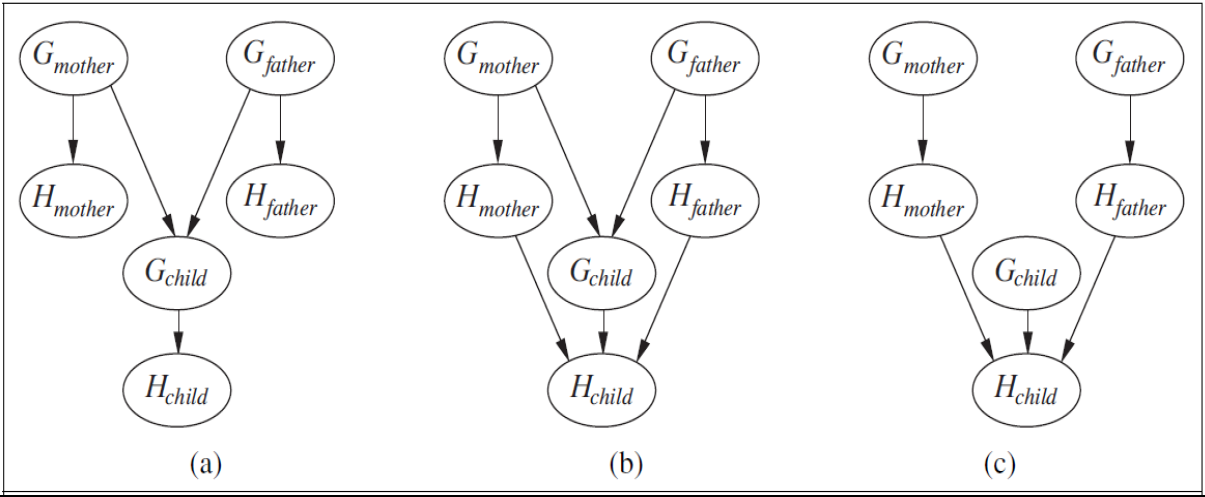

**<center>Fig 1: Three possible structures of a Bayesian network</center>**

Let $H_x$ be a random variable denoting the handedness of an individual x, with possible values l or r. A common hypothesis is that left- or right-handedness is inherited by a simple mechanism; that is, perhaps there is a gene $G_x$, also with values l or r, and perhaps actual handedness turns out mostly the same (with some probability s) as the gene an individual possesses. Furthermore, perhaps the gene itself is equally likely to be inherited from either
of an individual’s parents, with a small nonzero probability m of a random mutation flipping the handedness.


i. Which of the three networks in fig 1 claim that $P(G_{father},G_{mother},G_{child}) = P(G_{father}) P(G_{mother}) P(G_{child}) ? $

[Your Answer here]
（c）
There is a diverging connection between each pair in $G_{father},G_{mother},G_{child}$.

ii. Which of the three networks make independence claims that are  consistent with the hypothesis about the inheritance of handedness?

[Your Answer here]
(a) and (b)：
Since in (c) the child is independent with mother and father, which is contrary to the hypothesis. (b) can mimic (a).

iii. Which of the three networks is the best description of the hypothesis?

[Your Answer here]
(a)：
Since (b) contains some additional dependencies, it's different with the hypothesis. 

iv. Write down the CPT for the $G_{child}$ node in network (a), in terms of s and m.

[Your Answer here]

|  $G_{father}$   | $G_{mother}$  | l  | r  |
|  ----  | ----  | ----  |----  |
|  l |   l  |  l-m  | m  |
|  l  | r  |  l/2  | l/2  | 
|  r   | l |  l/2  | l/2  |  
|  r   | r   |  m  | l-m  |

b). What is the maximum number of edges in a Bayesian network (BN) with n nodes?  Prove that a valid BN containing this number of edges can be constructed.

[Your Answer here]
The maximum number of edges in a BN with n nodes is n(n-1)/2. 

Prove:

Consider a BN over $X_1$, $X_2,...X_n$ such that there is an edge between $X_i,X_j\forall{j}>i.$ We can easily find that the total number of edges is $$(n-1) + (n-2) + ...+0=n(n-1)/2.$$
This number should be the maximum number since if we want to construct a BN which the number of edges is greater than n(n-1)/2, the BN should have at least a pair of vertices which have more than one edge. That means it would be a cycle. And cycle is not allowed. 

## Programming + Written Problems

### Problem 2 : Inference (30 points)

In the Batcave, there is an alarm that sounds to indicate Gotham City needs Batman. The police chief signals the alarm when the violence score on a crime report is 4 or greater. If the chief signals, the alarm fails 1 in 1000 times,  but does not spontaneously go off. The chief also makes errors and signals the alarm 2% of the time when the violence score is less than 4, and fails to signal the alarm 2% when the violence score is 4 or greater. Street cops generate crime reports based on observed crime severity, assigning a crime an integer violence score between 1 and 5. The street cop make errors in assigning the violence score, with a +1 error occurring 10% of the time and 1 error 10% of the time (i.e. if the violence score is a 4, 80% of the time it is reported 4, 10% reported 3, and 10% reported 5), and violence scores are accurate 90% of the time for 5 and  1. Consider the Boolean variables A (alarm sounds), C (C Chief Signals), and multi-valued nodes V (street cop’s violence score) and S (crime severity). Assume the prior probability of S is uniform: P(S=i) = 1/5, for i=1:5.

a. Draw a Bayesian network for this domain and write down the tables for each node. **(15 points)**

[Your Answer here]
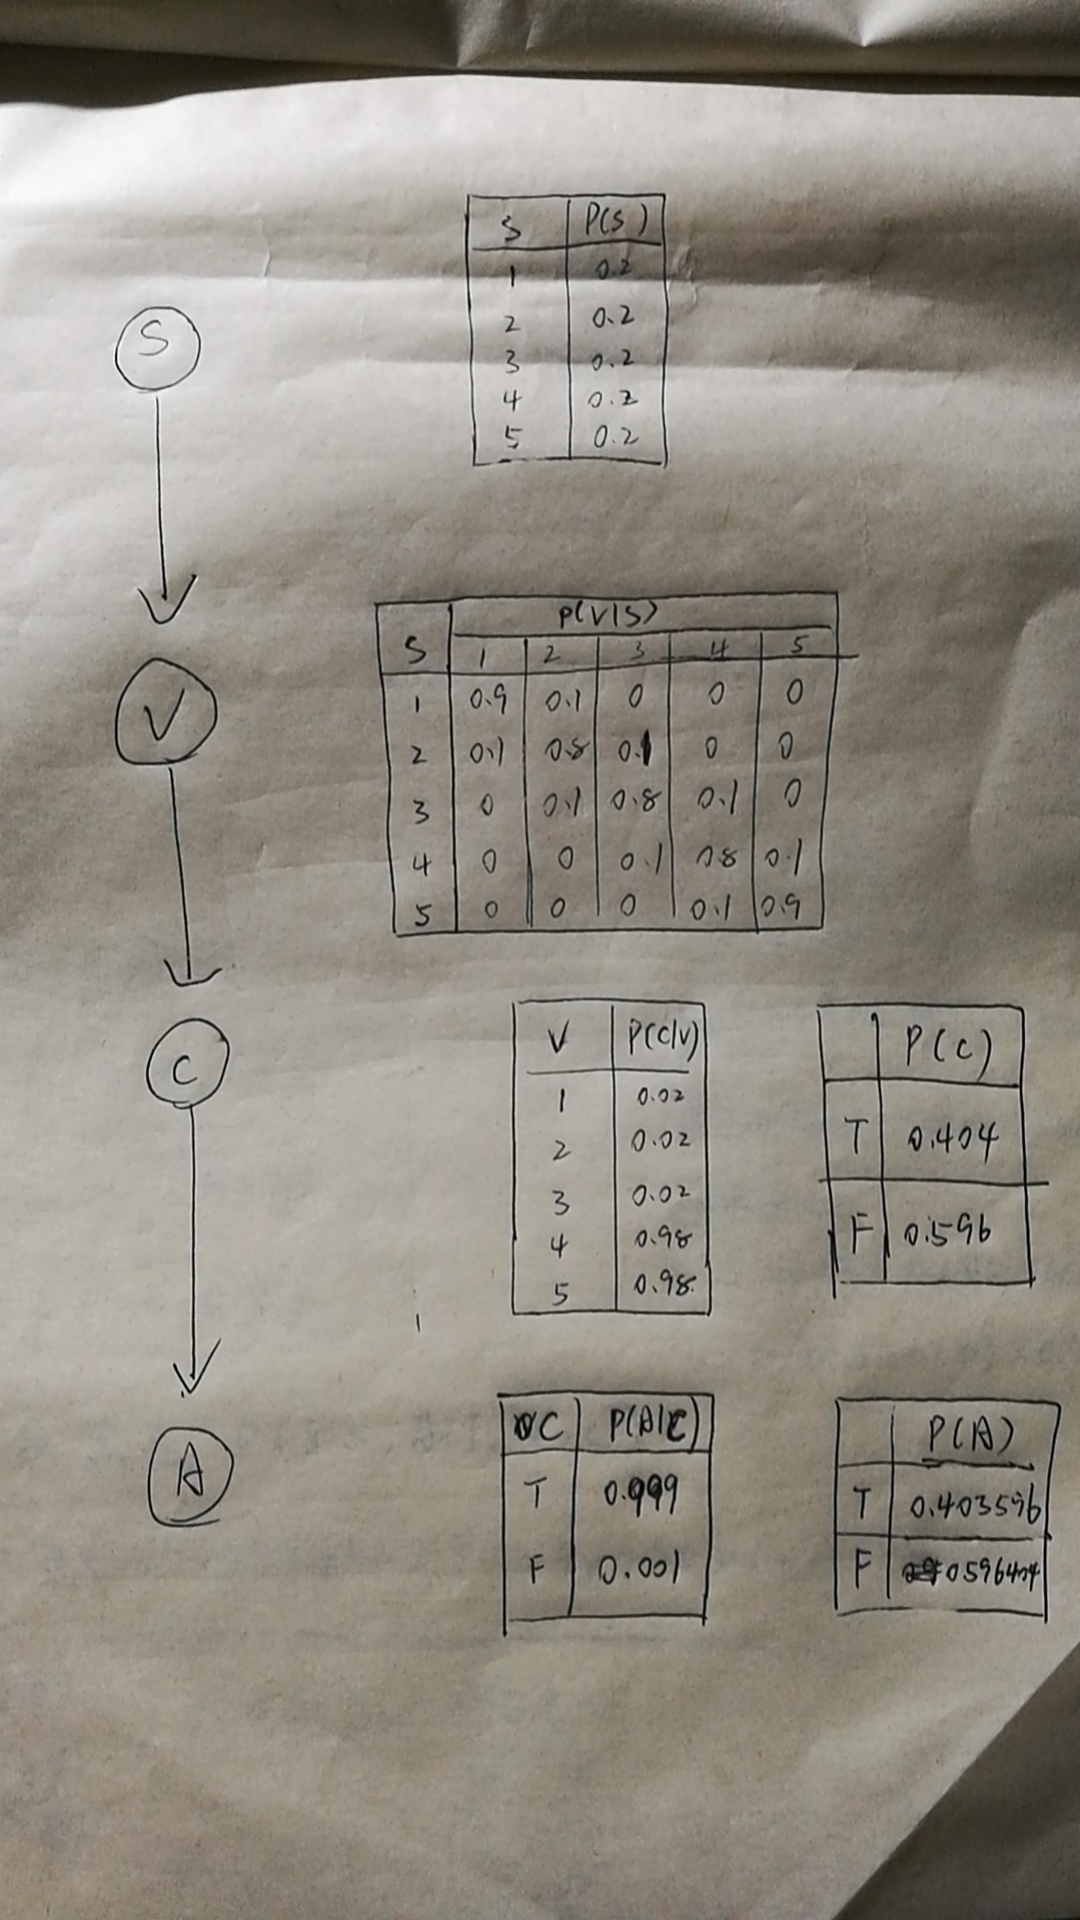

b. Compute the probability $P(S=5 | A=T)$ using inference by enumeration technique. (You need to show your work through either raw code or hand calculation. The former is strongly suggested). **(15 points)**

In [1]:
# Code


[Your Answer here]

P(S=5|A=T)

=P(S=5,A=T)/P(A=T)

=$\alpha\sum_v\sum_cP(S=5,A=T,v,c)$

=$\alpha$(0.98 * 0.1 * 0.2+ 0.9 * 0.98 * 0.2)

=0.486

### Problem 3 : Belief propagation (40 points)
The causal structures with more than one potential causes for an observation allow people to weigh one cause against another. Belief propagation in bayesian networks is a way to model information flow in such causal structures. (Ref: Juden Pearl's belief propagation). Here are the steps:

Figure (from J. Pearl, 1988) shows the children and parents of a node X. 

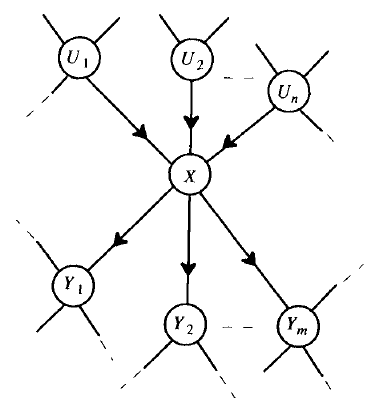

Node: X; Set of all X's parents, $ U = \{U_1, ... , U_n \} $ ; Set of all X's children, $ Y = \{Y_1, ... , Y_m \} $ 

1. **Likelihood** vector of observations through its children is equal to the term-by-term product of all incoming messages sent by the children to the node variable:   
    
    $ \lambda (X) = \Pi_{j=1}^m \lambda_{Y_j} (X) $

    For each possible value of a variable, we get one likelihood value. If a variable does not have children, for example, it is a leaf node and is not observed, then its likelihood is a unit vector. For example: if Holmes's grass is not observed initially, its likelihood is a unit vector. It tells how much information you get by observing the children.

2. **Prior probabilities** vector is equal to the product of the conditional probabilities of X given its parents and all the information the parents of X send to X i.e. the message passed from its parents:

      $ \pi (X) = \sum_{U_1,...,U_n} P(X|U_1,...,U_n) \Pi_{i=1}^n \pi_X(U_i) $

3. **Belief** We can now compute the beliefs. After observing events, it will be a posterior. Our belief of the values of X is the normalized term-by-term product of $\lambda(X) $ and $\pi(X) $ vectors i.e.

      $ BEL(X) = \alpha \lambda(X) \pi(X) $
   
    Thus, the node x can compute its own beliefs if it receives the messages from its children and messages from its parents.


4. **Message to parent** What message X sends to $U_i$ i.e. one of its parents: You are going to send all the messages that you receive from the children (we put all of them as $\lambda(X)$ which is the product of all the messages from the children) and all the messages you received from all the parents except $U_i$ because you are going to send message to $U_i$ but you also received messages from $ U_2,...,U_n $.
    
    $ \lambda_X(U_i) = \sum_X \lambda(X) \sum_{U_K, k \ne i} P(X|U_1,...,U_n) \Pi_{k \ne i} \pi_X(U_k)$


5. **Message to children** Similarly, what message X sends to one of its children: multiply the messages that other children send to X and all the messages that parents of X send to X.

    $\pi_{Y_j}(X) = \alpha [\pi_{k \ne j} \lambda_{Y_k}(X)] \sum_{U_1,...,U_n} P(x| U_1,...,U_n ) \Pi_i \pi_X(U_i) $

    or $\pi_{Y_j}(X) = \alpha \frac{BEL(X)}{\lambda_{Y_j}(X)} $ 
                    
    $\alpha$ is a normalization constant to ensure $ \sum_X \pi_{Y_j}(X) = 1$
            

Consider the following problem. Holmes and Watson are friendly neighbours. Holmes is early riser and can notice outside his house whether the grass is wet or not. He can also go to Watson's house and observe whether Watson's grass is wet or not. Holmes has a sprinkler. Watson does not have sprinkler. Consider 4 variables Rain, Sprinkler, Watson, Holmes and the following initial values are given

### P(R) , P(S)
P(R = T) = 0.2, P(S = T) = 0.1

### P(W|R)
P(W = T | R = T) = 1, P(W = T | R = F) = 0.2

### P(H|R, S)
P(H = T | R = T, S = T) = 1, P(H = T | R = F, S = T) = 0.9, P(H = T | R = T, S = F) = 1, P(H = T | R = F, S = F) = 0  

a). Draw the Bayes net for the wet grass problem. (Hint: Consider only 4 variables)

[ANSWER]
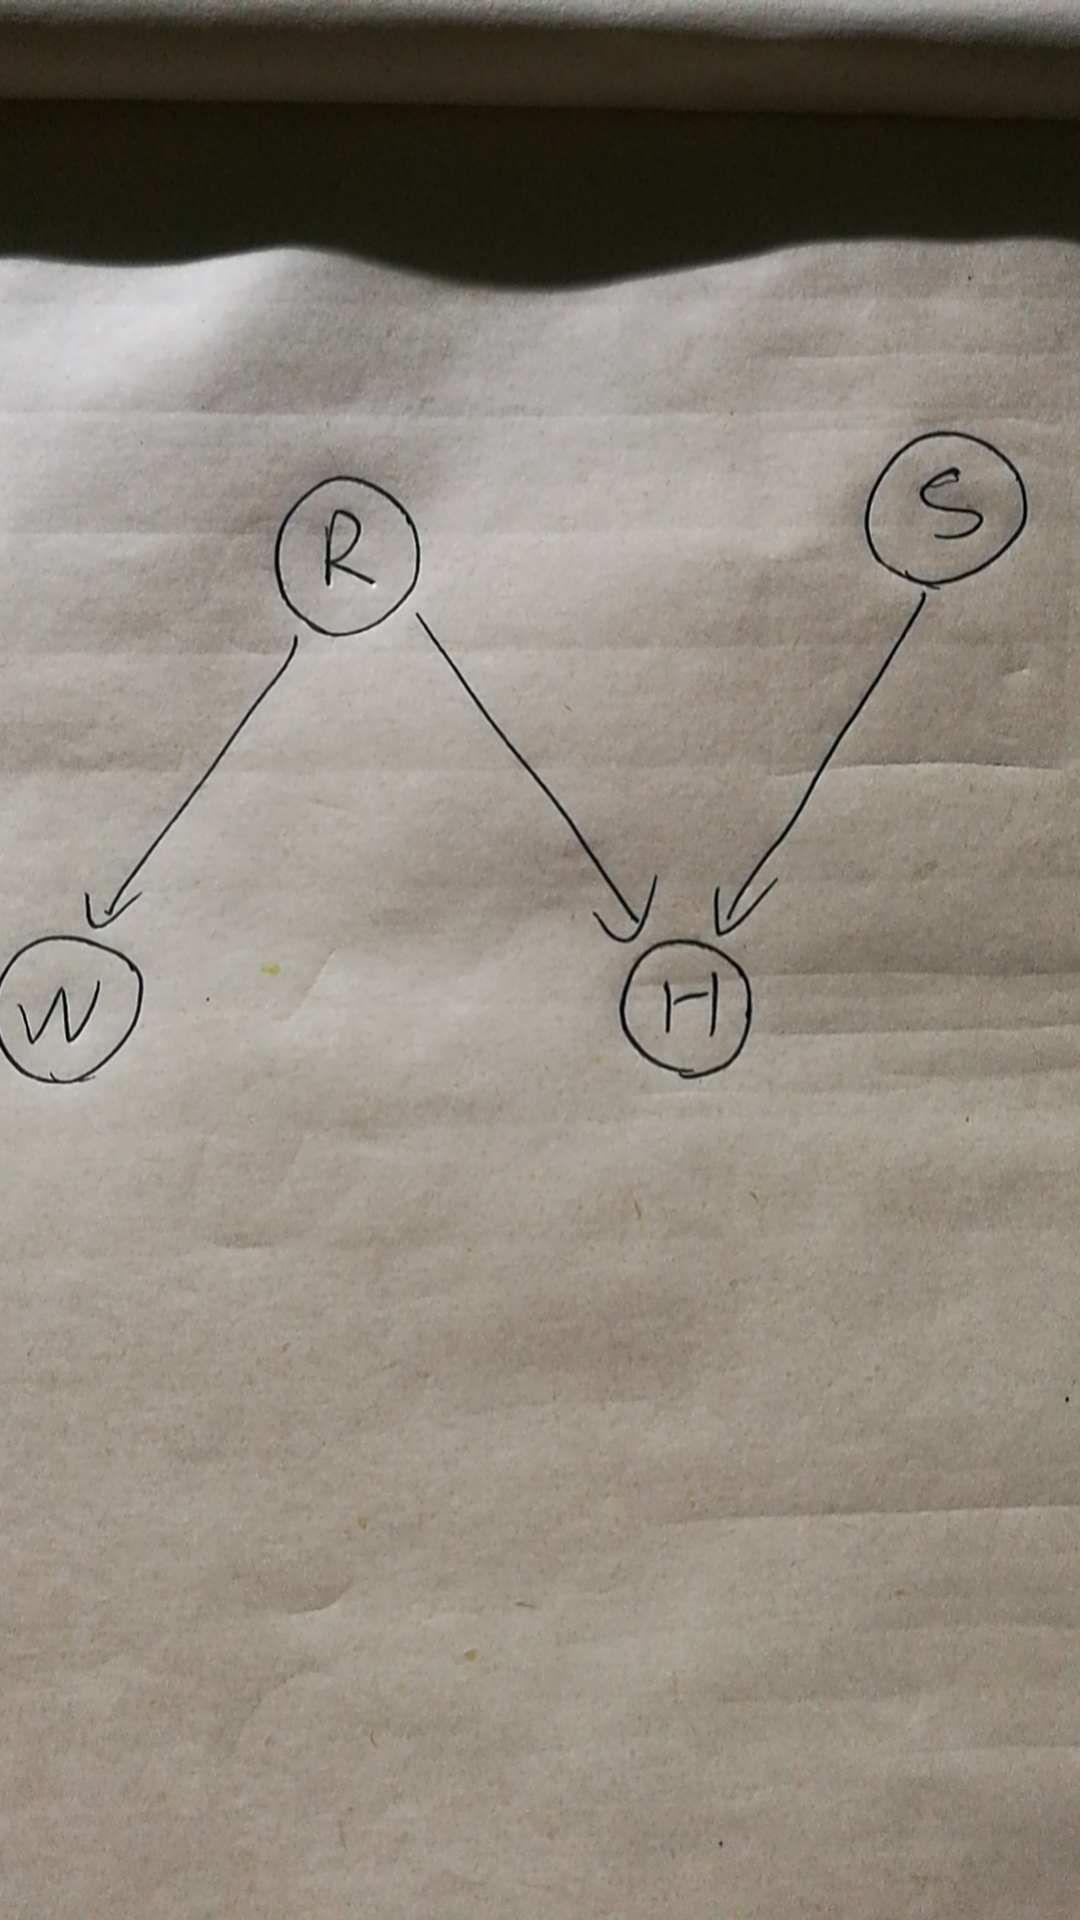

b) For the following parts, you can either compute by coding a program or manually (it's your choice but all the steps either in program or manual calculations must be clearly explained on what it is doing. Designing your program is also your choice.)

i). Assuming that there are no observations at the beginning. What is the belief that Watson's grass is wet?

In [2]:
# CODE OR CALCULATION



[ANSWER]
From the question, we know that:

P(R = T) = 0.2, P(S = T) = 0.1

P(W = T | R = T) = 1, P(W = T | R = F) = 0.2

P(H = T | R = T, S = T) = 1, P(H = T | R = F, S = T) = 0.9, P(H = T | R = T, S = F) = 1, P(H = T | R = F, S = F) = 0

let $\lambda(x)$ be the likelihood vectors.
Since $$\lambda(x)=\prod_{i=1}^N \lambda_{z_i}(x)$$
and $$\lambda_{X}(w_i)=\beta\sum_x\lambda(x)\sum_{w_k*k\neq i}P(x|u)\prod_{i=1}\pi_X(w_k)$$, we can know that all the $\lambda$ value would be unit vectors (1,1) and since p(R)=(0.2,0.8),
$$p(W=T)=\sum_{w}P(x|w)\prod_{k=1}^n\pi_X(w_k)=$$(0.2 * 1+0.8 * 0.2,0.2 * 0+0.8 * 0.8)=(0.36,0.64)


ii). What is the belief that Holmes's grass is wet?

In [3]:
# CODE OR CALCULATION



[ANSWER]

$p(H=T)=\sum_{w}P(x|w)\prod_{k=1}^n\pi_X(w_k)=$(0.2 * 0.1 * 1 + 0.8 * 0.1 * 0.9 + 0.2 * 0.9 * 1 + 0.8 * 0.9 * 0, 0.2 * 0.1 * 0 + 0.8 * 0.1 * 0.1 + 0.2 * 0.9 * 0 + 0.8 * 0.9 * 1) = (0.272, 0.728)

iii). Now Holmes observes that his grass is wet, what is the belief that Watson's grass is wet?

In [4]:
# CODE OR CALCULATION



[ANSWER]
Using boundary conditions, we set $\lambda(h)=(1,0)$, we get

|  node | BEL(x) | P(x) |  $\lambda(x)$ |
| ---- | ---- | ---- | ---- |
| R | (0.2,0.8) | (0.2,0.8) | (1,1) |
| S | (0.1,0.9) | (0.1,0.9) | (1,1) |
| W | (0.36,0.64) | (0.36,0.64) | (1,1)|
| H | (1,0) | (0.272,0.728) | (1,0)| 

$\lambda_{H(r)}$= (1 * 1 * 0.1 + 1 * 1 * 0.9 + 0 * 0 * 0.1 + 0 * 0 * 0.9, 1 * 0.9 * 0.1 + 1 * 0 * 0.9 + 0 * 0.1 * 0.1 + 0 * 1 * 0.9) = (1, 0.09)

$\lambda_{H(s)}$= (1 * 1 * 0.2 + 1 * 0.9 * 0.8 + 0 * 0 * 0.2 + 0 * 0.1 * 0.8, 1 * 1 * 0.2 + 1 * 0 * 0.8 + 0 * 0 * 0.2 + 0 * 1 * 0.8) = (0.92, 0.2)

Since $$P_{Z_j(x)}=\alpha\prod_{k\neq k}(x)\pi(x)$$
$p_{W(r)}$=(0.7353, 0.2647)

P(W=T)=(0.7353 * 1 + 0.2647 * 0.2, 0.7353 * 0 + 0.2647 * 0.8) = (0.7882, 0.2118)


iv). Now assume that Holmes observes that Watson's grass is also wet (in addition to Holmes's grass being wet), what is the belief that Sprinkler was left on?

In [5]:
# CODE OR CALCULATIONS



[ANSWER]
Since we can know that $\lambda_w$=(1,0) and p(W)=(0.7882,0.2118).
$p_{w(r)}$=(0.93,0.07) and $\lambda_{H(r)}$=(1.0,0.018)

BEL(W)=$\alpha\lambda_w p_w$=(0.16,0.84)

I have discussed this assignment with my classmates Yilong Liu.